<a href="https://colab.research.google.com/github/tenacioussami/Data-science/blob/main/Assignment_7_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


# **Introduction**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
print("Reading the Heart Disease dataset...")
data = pd.read_csv("/content/drive/MyDrive/datasets/heart_disease.csv")

print(f"Dataset loaded! We have data from {len(data)} patients")
print(f"Each patient has {len(data.columns)-1} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data.head()[['Age', 'Gender', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level']].head())

# Understand target column
print("\nUnderstanding Target (Heart Disease Status):")
diagnosis_counts = data['Heart Disease Status'].value_counts()
print(f"1 (Heart Disease Present): {diagnosis_counts[1]} patients")
print(f"0 (No Heart Disease):       {diagnosis_counts[0]} patients")
print(f"Total patients:             {len(data)} patients")


Mounted at /content/drive
Reading the Heart Disease dataset...
Dataset loaded! We have data from 10000 patients
Each patient has 20 medical measurements

First 5 patients in our dataset:
    Age  Gender  Cholesterol Level        BMI  Sleep Hours  Triglyceride Level
0  56.0    Male              155.0  24.991591     7.633228               342.0
1  69.0  Female              286.0  25.221799     8.744034               133.0
2  46.0    Male              216.0  29.855447     4.440440               393.0
3  32.0  Female              293.0  24.130477     5.249405               293.0
4  60.0    Male              242.0  20.486289     7.030971               263.0

Understanding Target (Heart Disease Status):
1 (Heart Disease Present): 2000 patients
0 (No Heart Disease):       8000 patients
Total patients:             10000 patients


# **Prepare Data**

In [ ]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['Heart Disease Status_numeric'] = data['Heart Disease Status'].map({'Yes': 1, 'No': 0})
data['Gender_numeric'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['High Blood Pressure'] = data['Blood Pressure'].apply(lambda x: 1 if x > 120 else 0)


# Convert diagnosis to numbers
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'Blood Pressure',      # Size of tumor
    'Cholesterol Level',     # Surface texture
    'BMI',        # Area of tumor
    'High Blood Pressure',  # How smooth the surface is
    'Triglyceride Level', # How compact the tumor is
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['Heart Disease Status_numeric']  # Malignant (1) or Benign (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (10000, 5)
y (diagnosis): (10000,)


# **Train and Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 8000 patients (computer will learn from these)
Testing:  2000 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
      Blood Pressure  Cholesterol Level        BMI  High Blood Pressure  \
4661           166.0              252.0  29.902644                    1   
7168           143.0              181.0  37.678628                    1   
1031           171.0              266.0  20.171845                    1   
6746           171.0              270.0  38.205544                    1   
9228           133.0              240.0  35.084120                    1   

      Triglyceride Level  
4661               270.0  
7168               195.0  
1031               245.0  
6746               307.0  
9228               382.0  


# **Train with Decision Tree**

In [ ]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=5,  # Keep it simple - not too complex
    random_state=20
)

print("Teaching Skill Morph doctor with training data...")
# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

print("\nSkill Morph Doctor has learned to recognize patterns like:")
print("- If tumor radius > 15mm AND texture rough → High malignant cancer risk")
print("- If tumor area small AND smooth → Likely benign cancer")


Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!

Skill Morph Doctor has learned to recognize patterns like:
- If tumor radius > 15mm AND texture rough → High malignant cancer risk
- If tumor area small AND smooth → Likely benign cancer


# **Test our Skill Morph Doctor**

In [ ]:

print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f"Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Yes" if y_test.iloc[i] == 1 else "No"
    predicted = "Yes" if predictions[i] == 1 else "No"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!
Skill Morph doctor made predictions for all test patients!
Note: We also got probability scores (confidence levels) for each prediction!

Skill Morph Doctor Accuracy: 0.795 (79.5%)
Needs improvement...

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Yes         | No                |     81.8%  | ❌
      2 | No          | No                |     81.8%  | ✅
      3 | No          | No                |     81.8%  | ✅
      4 | No          | No                |     77.0%  | ✅
      5 | No          | No                |     81.8%  | ✅
      6 | No          | No                |     77.0%  | ✅
      7 | Yes         | No                |     81.8%  | ❌
      8 | Yes         | No                |     82.2%  | ❌
      9 | Yes         | No              

# Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[1588    3]
 [ 407    2]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     1588        3   ← 3 False Alarms (predicted malignant but was benign)
Real Malignant  407        2   ← 407 Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: 1590
❌ Wrong Predictions: 410

⚠️ DANGER: Missing malignant cancer (407 cases) is more dangerous than false alarms (3 cases)



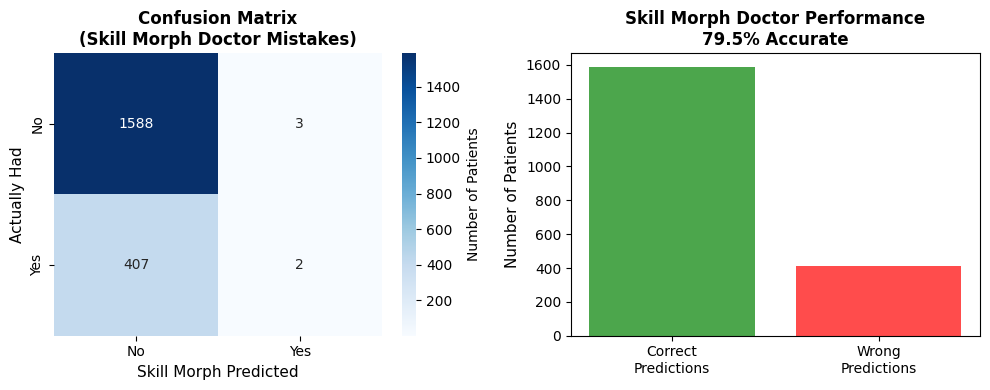

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← {cm[0,1]} False Alarms (predicted malignant but was benign)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← {cm[1,0]} Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Detailed Performance**

 MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers



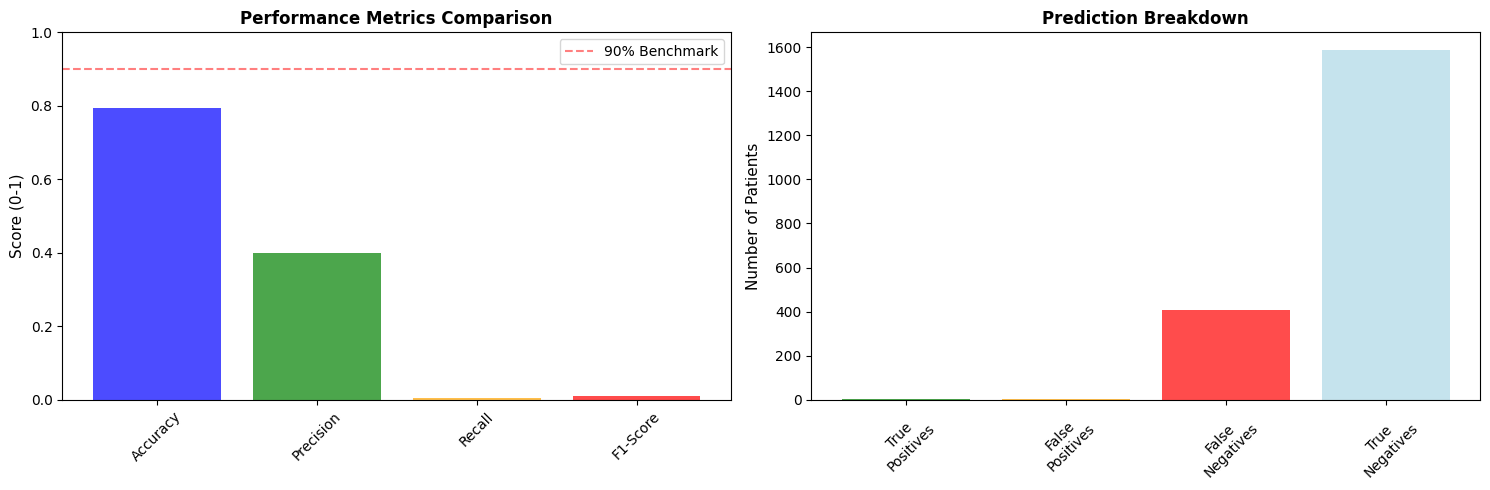

In [ ]:
print(""" MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers
""")

# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC CURVE & AUC - ADVANCED EVALUATION


 STEP 9: ROC Curve & AUC - The Ultimate Evaluation

ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve


OUR SKILL MORPH DOCTOR AUC SCORE:
AUC Score: 0.4827 (48.27%)


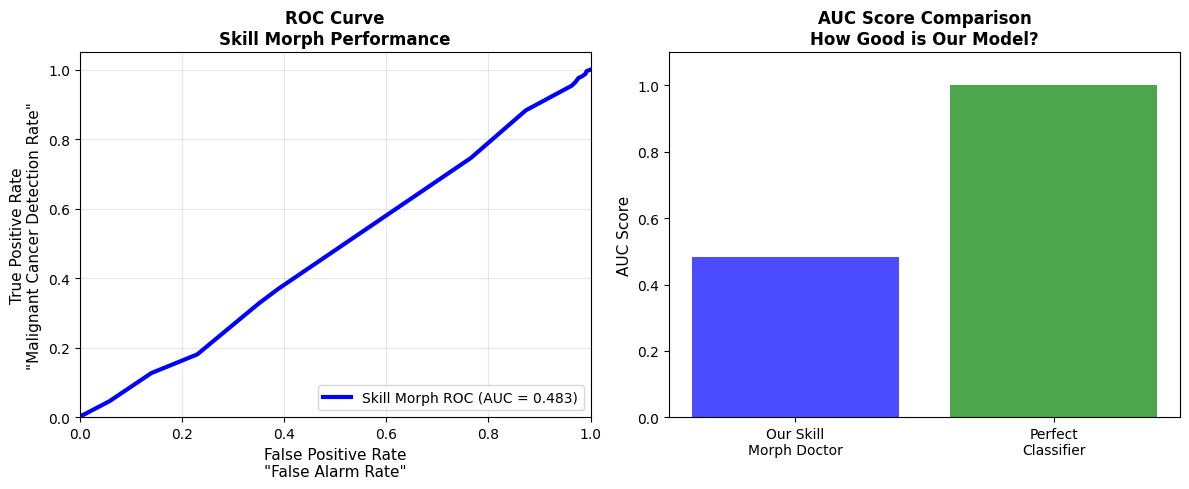

In [ ]:
print("\n STEP 9: ROC Curve & AUC - The Ultimate Evaluation")
print("=" * 60)

print("""
ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve

""")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"OUR SKILL MORPH DOCTOR AUC SCORE:")
print(f"{'='*40}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


Assignment

##Test depth 4 is the highest accuracy.

In [ ]:
# Question 1: Find the Best Tree Depth

# Task: Test depths 3, 4, 5 and find highest accuracy

# Optional: Feature: 10; test depths 5,6,7,8,9


# Question 2: Calculate All Metrics

# Task: Use best depth to calculate precision, recall, F1-score


# Question 3: Test on New Patients


# Question 4: Analyze Confusion Matrix

SyntaxError: invalid syntax (ipython-input-2051635358.py, line 1)